In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [4]:
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)
df['dropoff_longitude'].fillna(df['dropoff_longitude'].median(), inplace=True)

C:\Users\Khetmali Sir\AppData\Local\Temp\ipykernel_28036\2126800759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace=True)
C:\Users\Khetmali Sir\AppData\Local\Temp\ipykernel_28036\2126800759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [5]:
df = df.drop(['Unnamed: 0', 'key'], axis=1, errors='ignore')

In [6]:
df = df.assign(
    hour=df.pickup_datetime.dt.hour,
    day=df.pickup_datetime.dt.day,
    month=df.pickup_datetime.dt.month,
    year=df.pickup_datetime.dt.year,
    dayofweek=df.pickup_datetime.dt.dayofweek
)

In [7]:
df = df.drop('pickup_datetime', axis=1)

In [8]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

In [9]:
numeric_columns = df.select_dtypes(include=np.number).columns
for col in numeric_columns:
    remove_outliers(df, col)


In [10]:
corr = df.corr()
corr 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113


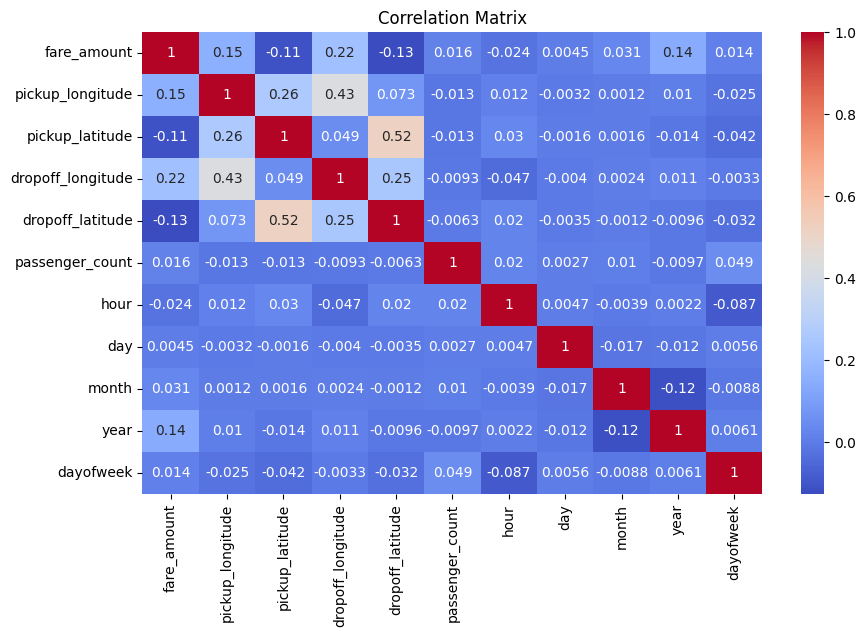

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
        'passenger_count', 'hour', 'day', 'month', 'year', 'dayofweek']]
y = df['fare_amount']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linreg = lin_reg.predict(X_test)

In [15]:
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
rmse_linreg = np.sqrt(mse_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)

In [16]:
print("Linear Regression - MSE:", mse_linreg)
print("Linear Regression - RMSE:", rmse_linreg)
print("Linear Regression - R²:", r2_linreg)
print("Linear Regression - MAE:", mae_linreg)

Linear Regression - MSE: 26.386705888116627
Linear Regression - RMSE: 5.136799187053804
Linear Regression - R²: 0.11310388398342608
Linear Regression - MAE: 4.083219620650741


In [17]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [18]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [19]:
print("\nRandom Forest - MSE:", mse_rf)
print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - R²:", r2_rf)
print("Random Forest - MAE:", mae_rf)


Random Forest - MSE: 6.165761458598265
Random Forest - RMSE: 2.483095136839961
Random Forest - R²: 0.7927596603720739
Random Forest - MAE: 1.5599475654166666
